# 손실함수

In [ ]:
# 손실함수 : 오차를 측정하는 함수
# mse                       평균제곱오차
# categorical cross entropy 다분류
# binary corss entropy      이진분류

# 순전파
#         input       hidden      output
#                                         출력값  90
#                                         실제값  100
#                                         손실(오차, 비용) -> 손실함수(mse : 평균제곱오차, 크로스 엔트로피)

# 실제값    10  7   6   5
# 출력값    3   9   4   2
# 오차      7   -2  2   3
# 오차절대  7   2   2   3
# 오차제곱  49  4   4   9

# 평균제곱오차 : mse -> 연산비용이 많이 듦
#                                       -> 개선 : 크로스 엔트로피
# 평균제곱
# 평균



# 역전파
#         input       hidden      output
#                                         출력값  90
#                                         실제값  100
#                                         손실(오차, 비용)

In [1]:
# 평균제곱오차
import numpy as np
# 평균제곱오차 : (출력값-정답)의 제곱의 합계를 데이터의 개수로 나눈 값
# 여기서는 two class인 경우라고 가정하여 0.5를 곱함
# 실제로는 class의 개수가 n개 일때 1/n을 곱해야 함

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 인덱스 2가 정답
t=np.array([0,0,1,0,0,0,0,0,0,0])

#인덱스 2를 정답으로 계산
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
print(mean_squared_error(y,t))

#인덱스 7을 정답으로 계산
y=np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(mean_squared_error(y,t))

0.09750000000000003
0.5975


In [2]:
# 엔트로피 : 정보를 최적으로 인코딩하기 위해 필요한 비트수
#      오늘이 무슨 요일인지 bit로 표현하려면? 3비트 필요
#          월  화  수  목   금  토  일
#         000 001 010 011 100 101 110

# 교차엔트로피 오차(cross entropy error)
# yk : 신경망의 출력
# tk : 정답 레이블
  

# 정답레이블이 2이고 신경망의 출력결과가 0.6이라면
# 교차엔트로피오차는 -log0.6=0.51이 된다.
# 신경망 출력이 0.1이라면
# -log0.1=2.30이 된다.
# 정답일 때의 출력으로 전체 값이 결정됨
# 0일때는 곱하기가 0이 되기 때문에 연산속도가 빨라짐
# 따라서 평균제곱오차보다 교차엔트로피 오차를 더 많이 사용하게 된다.

def cross_entropy_error(y,t): # y예측값, t실제값
    delta=1e-7 #값이 무한대가 되거나 0이 되지 않도록 빼주는 값
    return -np.sum(t * np.log(y+delta))

t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

cross_entropy_error(y,t)

0.510825457099338

# 오존량 예측

In [3]:
import pandas as pd
df = pd.read_csv("c:/workspace3/data/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


<Axes: xlabel='Result', ylabel='count'>

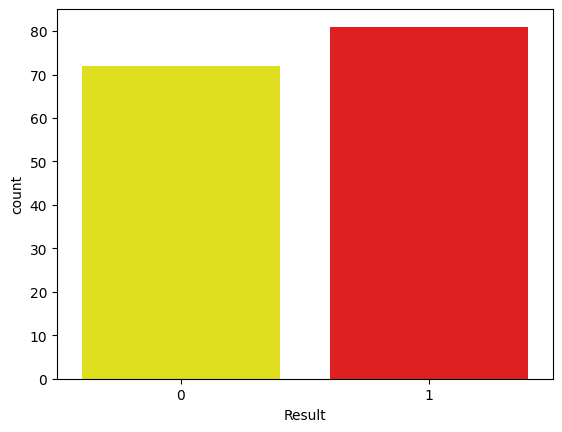

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot(x='Result', data=df, palette=colors)

In [5]:
#불균형 데이터셋
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

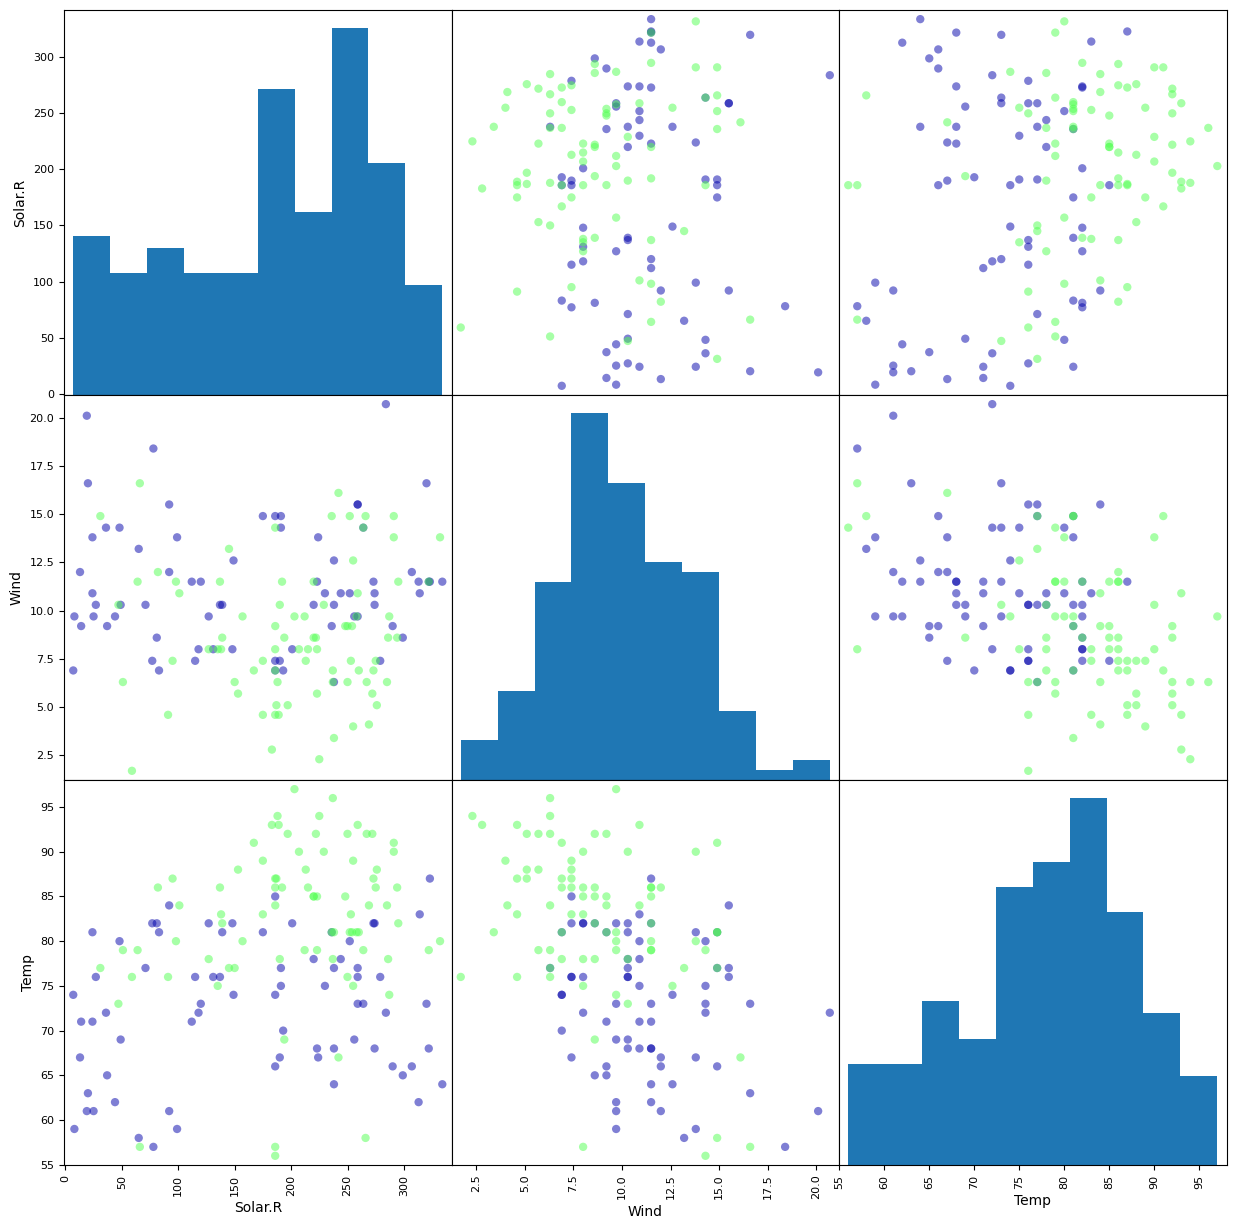

In [6]:
import mglearn
import matplotlib.pyplot as plt

#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)
plt.show()

In [7]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)  # y 0/1 낮은 쪽으로
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [8]:
X = X_samp[cols]
y = y_samp['Result']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#                                                         검증용 20%

In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

c:\Python3.9.13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [24]:
import numpy as np

pred=model.predict(X_test)

print(pred) # 출력
print()
# print(X_test.values)# 실제

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
학습용: 0.4956521739130435
검증용: 0.5172413793103449
검증용: 0.5172413793103449


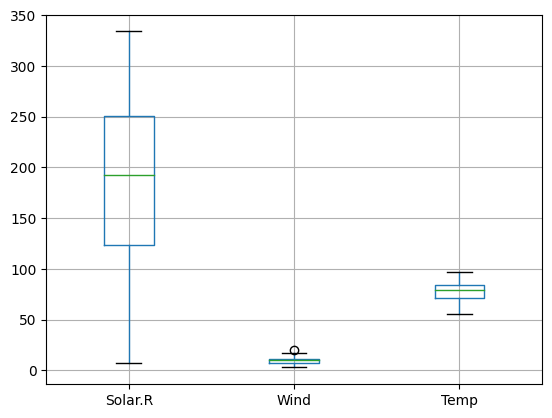

In [13]:
X_train.boxplot()

plt.show()

In [ ]:
# 0~1 정규화 : MinMaxScaler
# 평균 0, 표준편차 1 : StandardScaler

In [25]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정
# 인공신경망,딥러닝에서 자주 사용
# 변수의 범위를 왜곡하지 않음
# (특정값-최소값)/(최대값-최소값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때
# 40Kg  0으로 변환
# 120Kg 1로 변환
# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환

# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))

print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


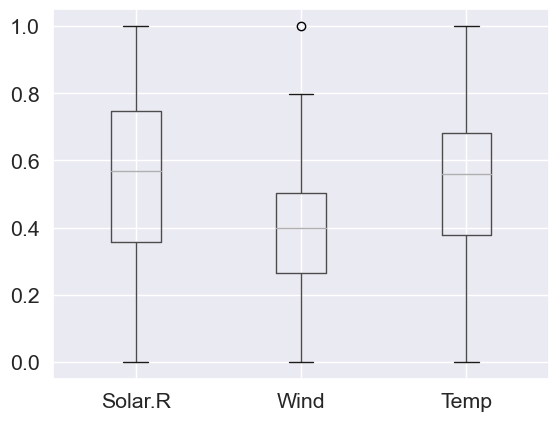

In [26]:
X_train_scaled.boxplot()

plt.show()

In [27]:
#Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)

# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean   9.847196e-17  4.981522e-16  6.217249e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.017401e+00 -2.122033e+00 -2.361740e+00
25%   -6.728957e-01 -7.450022e-01 -6.669730e-01
50%    1.291912e-01 -5.648689e-02  1.530758e-01
75%    7.985587e-01  4.823512e-01  6.997749e-01
max    1.756447e+00  3.056800e+00  2.121193e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.146647   0.217061  -0.005278
std     1.076194   1.191784   1.108749
min    -1.809666  -2.451323  -2.252401
25%    -0.770993  -0.565390  -0.502963
50%     0.290763   0.123126   0.043736
75%     0.890885   0.811641   0.699775
max     1.733365   3.236412   1.683833


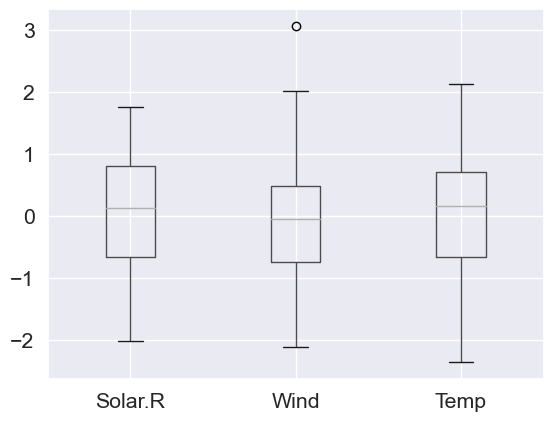

In [28]:
X_train_scaled.boxplot()

plt.show()

In [17]:
#표준화된 데이터로 다시 학습
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#정확도가 높아짐

학습용: 0.7652173913043478
검증용: 0.7241379310344828


c:\Python3.9.13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, pred)
cm

array([[12,  2],
       [ 3, 12]], dtype=int64)

In [19]:
df_cm=pd.DataFrame(cm, index=[0, 1],
                   columns=[0, 1])

df_cm

,0,1
0,12,2
1,3,12


<Axes: title={'center': 'Confusion Matrix'}>

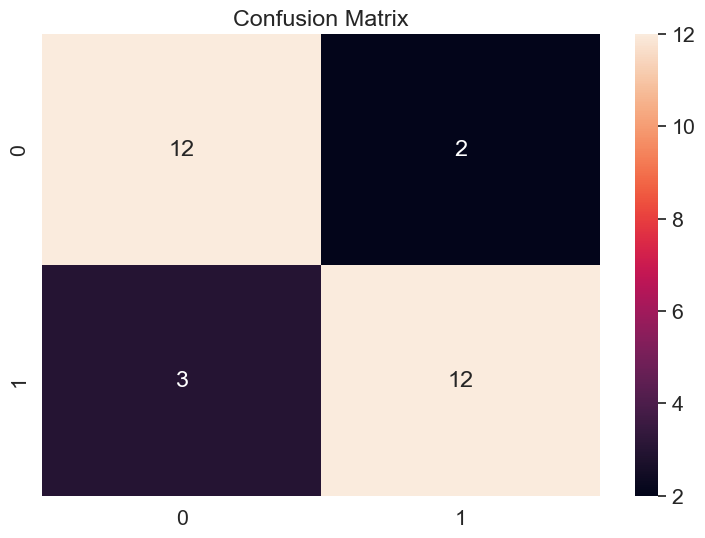

In [20]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

# 대용량 데이터 학습

In [50]:
# 대용량 데이터를 기계학습에 사용할 경우 메모리 부족 문제가 발생할 수 있음
#   서버 용량 증설
#   학습용 데이터를 적게 설정
#   분산 처리 시스템(hadoop, spark)

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [51]:
# 데이터를 섞고
idx = np.arange(X.shape[0])
#                  (150,4)
np.random.seed(0)
np.random.shuffle(idx)
#                       -> 재현성(random.seed 값을 고정)

X = X[idx]
y = y[idx]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#         평균 0, 표준편차 1
scaler.fit(X)
#       패턴 분석

X = scaler.transform(X)

In [54]:
# hyper parameter(하이퍼 파라미터)

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],  # 은직층의 노드 수  (10,) : 은닉층 1개, 노드 10개
    'activation': ['tanh', 'relu'], # 활성화 함수
    'alpha': [0.0001, 0.01],
}

model = MLPClassifier(random_state=0, max_iter=5000)

clf = GridSearchCV(model, param_grid=params, cv=3)
#     교차검증(Cross Validation)              교차검증 횟수
clf.fit(X, y)

print(clf.best_score_) # 최고 점수
print(clf.best_params_) # 최적의 파라미터
print(clf.best_estimator_)  # 최적의 모형

0.9733333333333333
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [55]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)  
#      패턴 분석
X_train = scaler.transform(X_train)
#         변환
X_test = scaler.transform(X_test)
#        검증용

In [57]:
# generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸릴 수 있음

def make_numbers(n):
    while n < 6:
        yield n # 메모리에 저장하지 않고 호출한 곳으로 값을 보냄(return과 비슷한 역할)
        n += 1

for i in make_numbers(0):
    print(i)        

0
1
2
3
4
5


In [58]:
import sys

#리스트의 데이터가 늘어나면 메모리 사용량이 증가한다.    
#리스트의 모든 데이터를 메모리에 적재

a = [i for i in range(100)]
print(sys.getsizeof(a))

b = [i for i in range(1000)]
print(sys.getsizeof(b))

#generator expression : 위에서 언급한 generator 함수를 좀더 쉽게 사용할 수 있도록 제공되는 표현식
#[] 대신 ()을 사용하면 메모리를 효율적으로 사용할 수 있음
#모든 데이터를 메모리에 적재하지 않고 next() 함수를 통해 조금씩 메모리에 적재

c = (i for i in range(100))
print(sys.getsizeof(c))

d = (i for i in range(1000))
print(sys.getsizeof(d))

920
8856
112
112


In [59]:
import time

def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

# 리스트
items1 = [func_sleep(x) for x in range(5)]

# generator 생성
items2 = (func_sleep(y) for y in range(5))

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


In [60]:
%%time

#리스트를 사용하면 리스트의 모든 원소를 한꺼번에 처리한 후 최종 결과가 출력됨    

for i in items1:
    print(i)

0
1
2
3
4
CPU times: total: 0 ns
Wall time: 0 ns


In [61]:
%%time

#generator를 사용하면 수행 시간이 긴 연산을 한꺼번에 수행하지 않고 조금씩 수행함  

for i in items2:
    print(i)

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
CPU times: total: 0 ns
Wall time: 5.03 s


In [62]:
print('메모리 사용량:',sys.getsizeof(items1))
print('메모리 사용량:',sys.getsizeof(items2))

메모리 사용량: 120
메모리 사용량: 112


In [63]:
#일반적인 방식(한꺼번에 처리하는 방식)
from sklearn.metrics import accuracy_score

clf=MLPClassifier(max_iter=5000, random_state=0)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [64]:
#batch(X_train, y_train, 10)
#전체 데이터를 보내지 않고 10개씩 조금씩 보내서 처리하는 방식

def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

#10개씩 12회로 나누어 처리하는 방식
clf2 = MLPClassifier(random_state=0)

#시간은 더 오래 걸릴 수 있으나 메모리를 절약할 수 있는 방법
points_tr=[]
points_te=[]
samp = batch(X_train, y_train, 10)

for idx, (chunk_X, chunk_y) in enumerate(samp):
    print(idx)
    #부분적으로 학습, 처음에는 정확도가 낮지만 점차 향상됨
    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2])
    #    부분학습
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)
    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


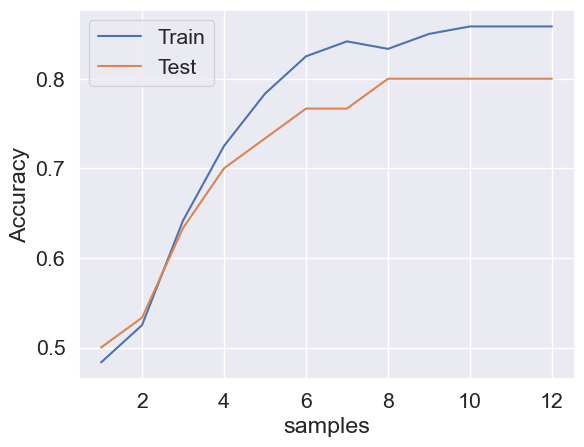

In [65]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=15
plt.plot(range(1,13), points_tr, label="Train")
plt.plot(range(1,13), points_te, label="Test")

plt.ylabel("Accuracy")
plt.xlabel("samples")

plt.legend()